In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import pycountry
import plotly.express as px
import squarify
import seaborn as sns

In [2]:
# Load the CSV file into a pandas DataFrame
data = pd.read_csv('relay_data.csv')

# Data analysis

# 1. Basic information about the dataset
print("Number of rows: ", len(data))
print("Number of columns: ", len(data.columns))
print("Column names: ", list(data.columns))

# 2. Summary statistics
print("\nSummary Statistics:")
print(data.describe())

# 3. Countries with the most relays
print("\nCountries with the most relays:")
top_countries = data['CountryCode'].value_counts().head(5)
print(top_countries)

# 4. Relays with the highest bandwidth
print("\nRelays with the highest bandwidth:")
top_bandwidth_relays = data.nlargest(5, 'Bandwidth')
print(top_bandwidth_relays[['Nickname', 'Bandwidth']])

# 5. Flags distribution
print("\nFlags distribution:")
flags_count = data['Flags'].value_counts()
print(flags_count)

# 6. Filtering based on conditions
print("\nRelays with bandwidth greater than 1 Gbps and flags 'Fast' and 'Running':")
filtered_relays = data[(data['Bandwidth'] > 1000000) & (data['Flags'].str.contains('Fast')) & (data['Flags'].str.contains('Running'))]
print(filtered_relays[['Nickname', 'Bandwidth', 'Flags']])

Number of rows:  6942
Number of columns:  9
Column names:  ['Address', 'CountryCode', 'Nickname', 'Fingerprint', 'Bandwidth', 'Flags', 'Guard', 'Middle', 'Exit']

Summary Statistics:
           Bandwidth
count    6942.000000
mean    15384.408960
std     17945.483651
min         0.000000
25%      2700.000000
50%     11000.000000
75%     21000.000000
max    250000.000000

Countries with the most relays:
CountryCode
DE    1657
US    1256
FR     402
NL     395
PL     283
Name: count, dtype: int64

Relays with the highest bandwidth:
           Nickname  Bandwidth
4362  RandomRecipes     250000
2453      hopScotch     200000
1979      MemeTeam3     170000
4383        Reeses2     150000
1569         shhovh     140000

Flags distribution:
Flags
Fast Guard HSDir Running Stable V2Dir Valid                   2139
Exit Fast Guard HSDir Running Stable V2Dir Valid               938
Fast HSDir Running Stable V2Dir Valid                          592
Exit Fast Running Stable Valid                      

In [12]:
# Read the CSV file
data = pd.read_csv('relay_data.csv')

# Load a dataset containing the mapping of countries to regions and sub-regions
region_mapping = pd.read_csv('country_region_mapping.csv') 

# Merge the region mapping with the data for region classification
data = pd.merge(data, region_mapping[['CountryCode', 'Region']], on='CountryCode', how='left')
grouped_data_region = data.groupby('Region').size().reset_index(name='RelayCount')

# Merge the region mapping with the data for sub-region classification
data = pd.merge(data, region_mapping[['CountryCode', 'SubRegion']], on='CountryCode', how='left')
grouped_data_subregion = data.groupby('SubRegion').size().reset_index(name='RelayCount')

# Create the bar chart for region classification
fig_region = px.bar(grouped_data_region, x='Region', y='RelayCount', color='Region',
                    title='Tor Relay Count by Region')
fig_region.update_layout(xaxis_title='Region', yaxis_title='Relay Count')

# Create the bar chart for sub-region classification
fig_subregion = px.bar(grouped_data_subregion, x='SubRegion', y='RelayCount', color='SubRegion',
                       title='Tor Relay Count by Sub-Region')
fig_subregion.update_layout(xaxis_title='Sub-Region', yaxis_title='Relay Count')

# Display the bar charts
fig_region.show()
fig_subregion.show()


In [15]:
# Read the CSV file
data = pd.read_csv('relay_data.csv')

# Group the data by country and count the number of relays
grouped_data = data.groupby('CountryCode').size().reset_index(name='RelayCount')

# Map country codes to country names using pycountry
country_mapping = {}
for country in pycountry.countries:
    if hasattr(country, 'alpha_2') and hasattr(country, 'name'):
        country_mapping[country.alpha_2] = country.name

# Add country names to the grouped data
grouped_data['CountryName'] = grouped_data['CountryCode'].map(country_mapping)

# Sort the data by relay count in descending order
grouped_data = grouped_data.sort_values('RelayCount', ascending=False)

# Create the treemap using squarify
fig = px.treemap(grouped_data, path=['CountryName'], values='RelayCount',
                 color='RelayCount', color_continuous_scale='Blues',
                 labels=grouped_data['CountryName'], hover_name=grouped_data['CountryName'])

# Resize the treemap labels for better visibility
fig.update_traces(textfont=dict(size=12))

# Set title and update layout aesthetics
fig.update_layout(title='Tor Relay Distribution by Country',
                  title_font_size=24,
                  margin=dict(t=100, b=10, r=10, l=10),
                  paper_bgcolor='rgb(243, 243, 243)',
                  plot_bgcolor='rgb(243, 243, 243)')

# Display the treemap
fig.show()


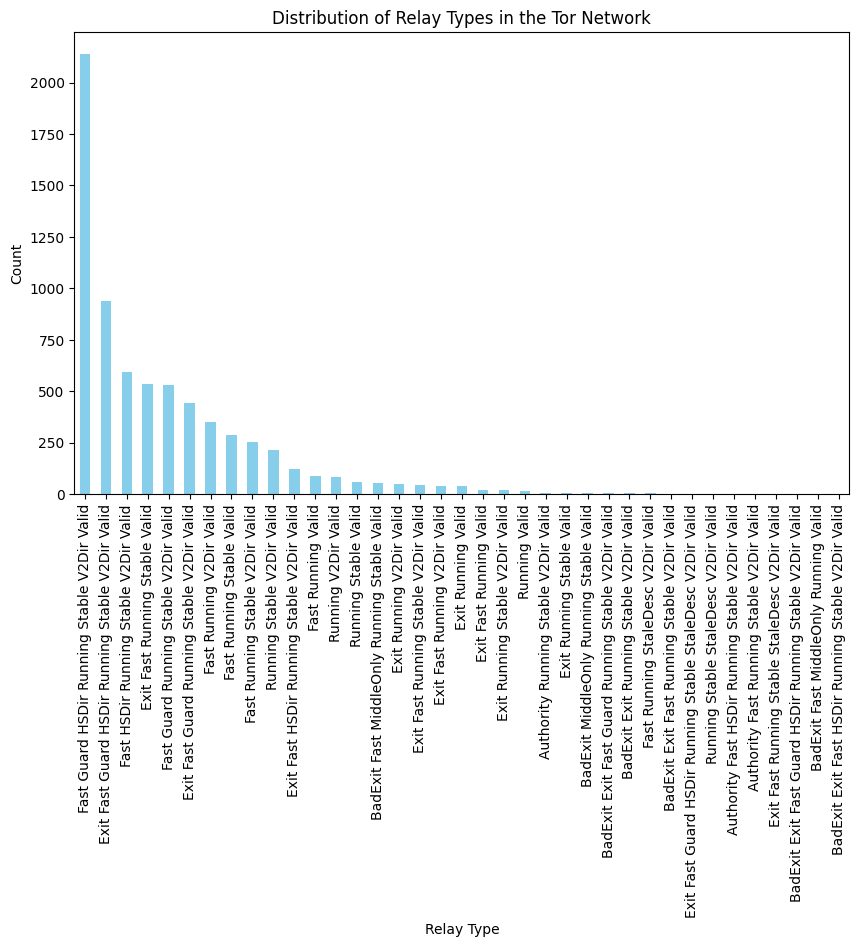

In [16]:
# Read the CSV file
data = pd.read_csv('relay_data.csv')

# Count the occurrence of each relay type
relay_type_counts = data['Flags'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
relay_type_counts.plot(kind='bar', color='skyblue')

# Set chart title and labels
plt.title('Distribution of Relay Types in the Tor Network')
plt.xlabel('Relay Type')
plt.ylabel('Count')

# Display the chart
plt.show()


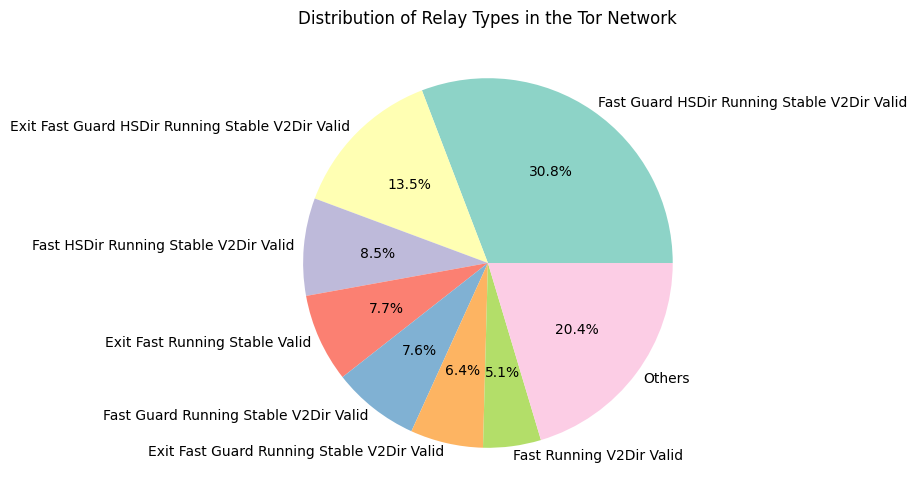

In [17]:
# Read the CSV file
data = pd.read_csv('relay_data.csv')

# Count the occurrence of each relay type
relay_type_counts = data['Flags'].value_counts()

# Calculate the total count
total_count = relay_type_counts.sum()

# Calculate the threshold for "Others" category
threshold = total_count * 0.05

# Filter relay types based on the threshold
filtered_types = relay_type_counts[relay_type_counts >= threshold]
other_count = relay_type_counts[relay_type_counts < threshold].sum()

# Create a list of labels for pie chart
labels = list(filtered_types.index)
labels.append('Others')

# Create a list of counts for pie chart
counts = list(filtered_types.values)
counts.append(other_count)

# Create a list of percentages for pie chart
percentages = [f'{(count / total_count) * 100:.1f}%' if count >= threshold else '' for count in counts]

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(counts, labels=labels, autopct=lambda pct: percentages.pop(0), labeldistance=1.05, colors=plt.cm.Set3.colors)

# Set chart title
plt.title('Distribution of Relay Types in the Tor Network')

# Display the chart
plt.show()


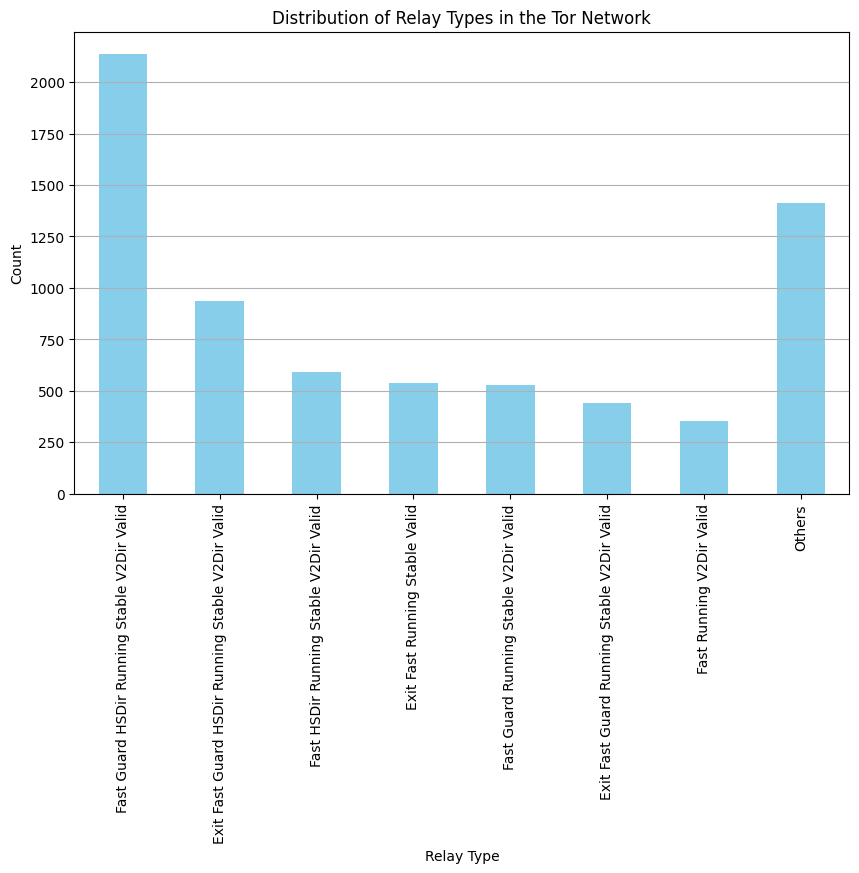

In [20]:
# Read the CSV file
data = pd.read_csv('relay_data.csv')

# Count the occurrence of each relay type
relay_type_counts = data['Flags'].value_counts()

# Calculate the total count
total_count = relay_type_counts.sum()

# Calculate the threshold for "Others" category
threshold = total_count * 0.05

# Filter relay types based on the threshold
filtered_types = relay_type_counts[relay_type_counts >= threshold]
other_count = relay_type_counts[relay_type_counts < threshold].sum()

# Append "Others" to the filtered types
filtered_types['Others'] = other_count

# Calculate the percentages for filtered types
percentages = [(count / total_count) * 100 if count >= threshold else 0 for count in filtered_types.values]

# Create a bar chart
plt.figure(figsize=(10, 6))
filtered_types.plot(kind='bar', color='skyblue')

# Add data labels to the bars
# for i, count in enumerate(filtered_types):
#     if count >= threshold:
#         plt.text(i, count + 1, f'{percentages[i]:.1f}%', ha='center')

# Set chart title and labels
plt.title('Distribution of Relay Types in the Tor Network')
plt.xlabel('Relay Type')
plt.ylabel('Count')

plt.grid(axis='y')

# Display the chart
plt.show()


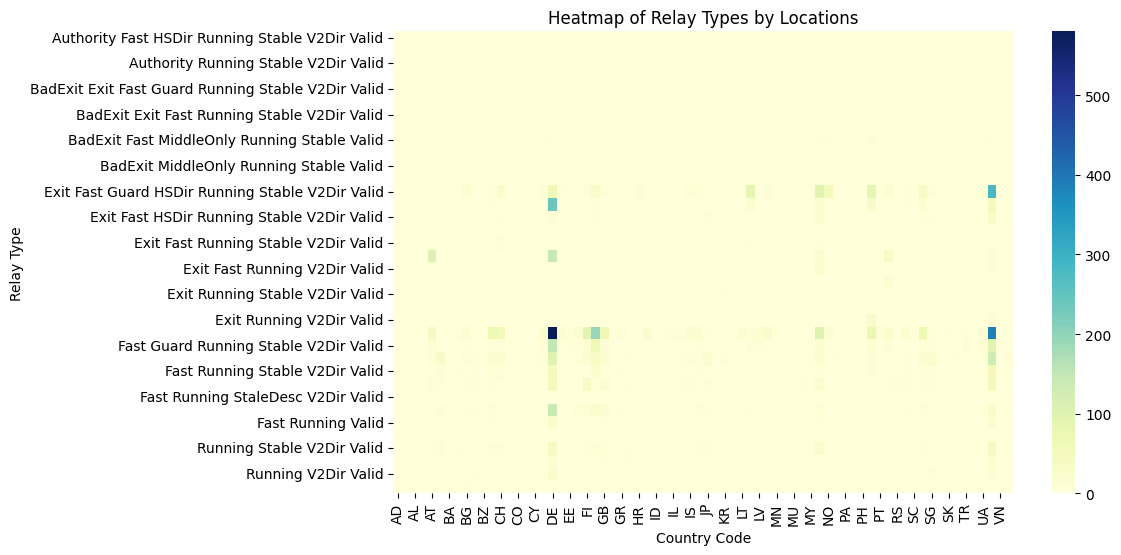

In [24]:
# Read the CSV file
data = pd.read_csv('relay_data.csv')

# Create a cross-tabulation of relay types and locations
heatmap_data = pd.crosstab(data['Flags'], data['CountryCode'])

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu')

# Set chart title and labels
plt.title('Heatmap of Relay Types by Locations')
plt.xlabel('Country Code')
plt.ylabel('Relay Type')

# Display the heatmap
plt.show()


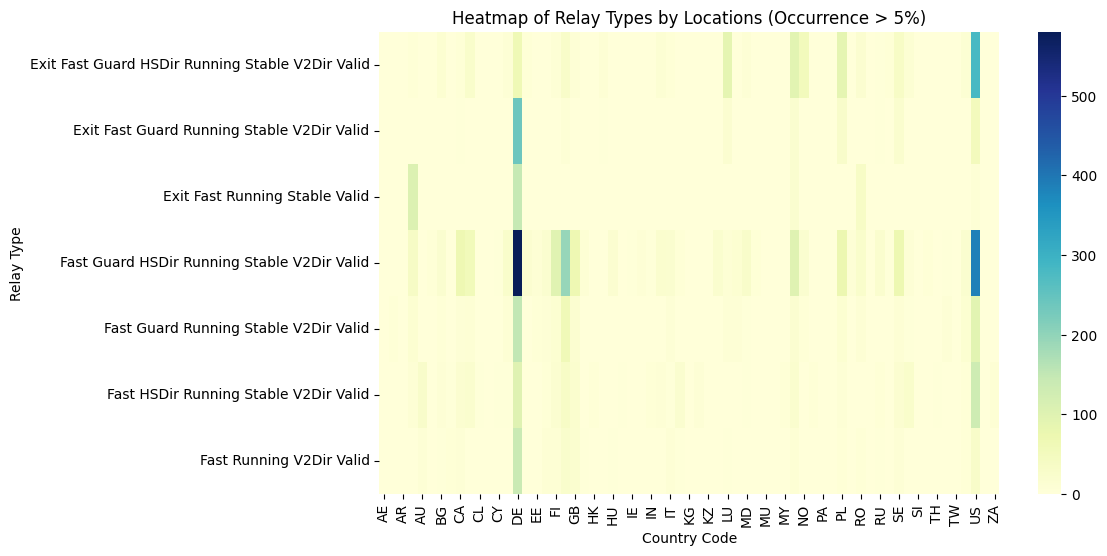

In [26]:
# Read the CSV file
data = pd.read_csv('relay_data.csv')

# Calculate the total count
total_count = len(data)

# Count the occurrence of each relay type
relay_type_counts = data['Flags'].value_counts()

# Filter relay types based on the 5% threshold
filtered_types = relay_type_counts[relay_type_counts / total_count > 0.05]

# Filter the data based on the filtered relay types
filtered_data = data[data['Flags'].isin(filtered_types.index)]

# Create a cross-tabulation of relay types and locations
heatmap_data = pd.crosstab(filtered_data['Flags'], filtered_data['CountryCode'])

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu')

# Set chart title and labels
plt.title('Heatmap of Relay Types by Locations (Occurrence > 5%)')
plt.xlabel('Country Code')
plt.ylabel('Relay Type')

# Display the heatmap
plt.show()


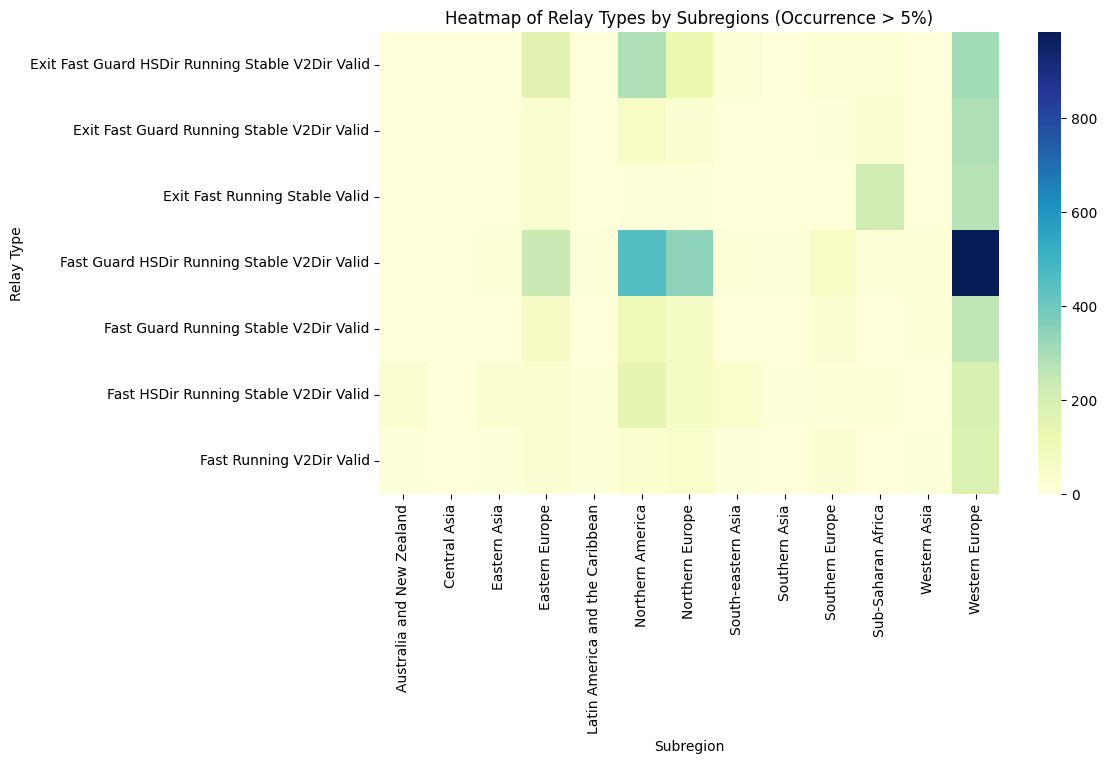

In [27]:
# Read the CSV file
data = pd.read_csv('relay_data.csv')

# Load the mapping of countries to subregions
country_to_subregion = pd.read_csv('country_region_mapping.csv')

# Merge the data with the subregion mapping
data = data.merge(country_to_subregion, on='CountryCode')

# Calculate the total count
total_count = len(data)

# Count the occurrence of each relay type
relay_type_counts = data['Flags'].value_counts()

# Filter relay types based on the 5% threshold
filtered_types = relay_type_counts[relay_type_counts / total_count > 0.05]

# Filter the data based on the filtered relay types
filtered_data = data[data['Flags'].isin(filtered_types.index)]

# Create a cross-tabulation of relay types and subregions
heatmap_data = pd.crosstab(filtered_data['Flags'], filtered_data['SubRegion'])

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu')

# Set chart title and labels
plt.title('Heatmap of Relay Types by Subregions (Occurrence > 5%)')
plt.xlabel('Subregion')
plt.ylabel('Relay Type')

# Display the heatmap
plt.show()


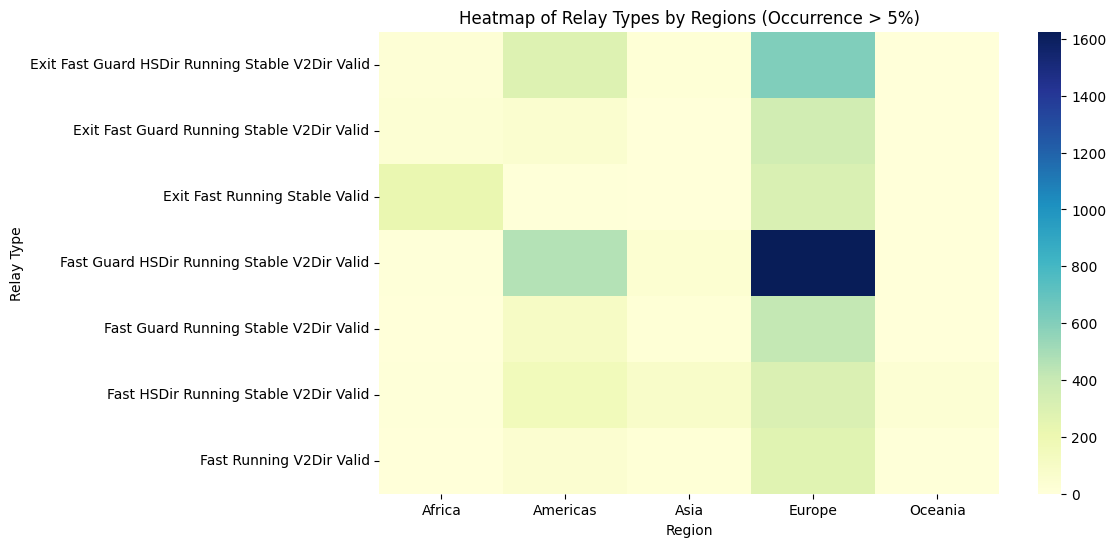

In [28]:
# Read the CSV file
data = pd.read_csv('relay_data.csv')

# Load the mapping of countries to regions
country_to_subregion = pd.read_csv('country_region_mapping.csv')

# Merge the data with the region mapping
data = data.merge(country_to_subregion, on='CountryCode')

# Calculate the total count
total_count = len(data)

# Count the occurrence of each relay type
relay_type_counts = data['Flags'].value_counts()

# Filter relay types based on the 5% threshold
filtered_types = relay_type_counts[relay_type_counts / total_count > 0.05]

# Filter the data based on the filtered relay types
filtered_data = data[data['Flags'].isin(filtered_types.index)]

# Create a cross-tabulation of relay types and subregions
heatmap_data = pd.crosstab(filtered_data['Flags'], filtered_data['Region'])

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu')

# Set chart title and labels
plt.title('Heatmap of Relay Types by Regions (Occurrence > 5%)')
plt.xlabel('Region')
plt.ylabel('Relay Type')

# Display the heatmap
plt.show()